In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_parquet('loan_data/cleaned_data.parquet')
data1 = pd.read_parquet('loan_data/cleaned_data_with_dummies.parquet')

In [3]:
pd.options.display.max_columns=None

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date
0,1077501,1296599,5000,5000,10.65,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,1.0,0.0,0.0,3.0,0.0,9.0,f,5000.00,861.07,0.00,0.0,5000.0,10,36,395.0,72.0
1,1077430,1314167,2500,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,f,456.46,435.17,117.08,0.0,2500.0,0,60,224.0,72.0
2,1077175,1313524,2400,2400,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0.0,2.0,0.0,0.0,2.0,0.0,10.0,f,2400.00,603.65,0.00,0.0,2400.0,10,36,193.0,72.0
3,1076863,1277178,10000,10000,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0.0,1.0,35.0,0.0,10.0,0.0,37.0,f,10000.00,2209.33,0.00,0.0,10000.0,10,36,262.0,72.0
4,1075358,1311748,3000,3000,12.69,67.79,B,B5,RENT,80000.0,Source Verified,Current,other,972xx,OR,17.94,0.0,0.0,38.0,0.0,15.0,0.0,38.0,f,2233.10,1009.07,0.00,0.0,3000.0,1,60,263.0,72.0


In [5]:
data1.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,1077501,1296599,5000,5000,10.65,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,1.0,0.0,0.0,3.0,0.0,9.0,f,5000.00,861.07,0.00,0.0,5000.0,10,36,395.0,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,f,456.46,435.17,117.08,0.0,2500.0,0,60,224.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1077175,1313524,2400,2400,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0.0,2.0,0.0,0.0,2.0,0.0,10.0,f,2400.00,603.65,0.00,0.0,2400.0,10,36,193.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1076863,1277178,10000,10000,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0.0,1.0,35.0,0.0,10.0,0.0,37.0,f,10000.00,2209.33,0.00,0.0,10000.0,10,36,262.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0

In [6]:
data.shape, data1.shape

((466285, 33), (466285, 159))

In [7]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

When building LGD and EAD models, it is good practice to build modelswith data from borrowers that have has enough time to repay part of the remaining debt.

In our data, these are accounts with Loan_status: 'Charged Off', 'Does not meet the credit policy. Status:Charged Off'

In [8]:
loan_data_defaults = data[data['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'])]

In [9]:
loan_data_defaults.shape

(43236, 33)

In [10]:
loan_data_defaults.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date
1,1077430,1314167,2500,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,f,456.46,435.17,117.08,0.0,2500.0,0,60,224.0,72.0
8,1071795,1306957,5600,5600,21.28,152.39,F,F2,OWN,40000.0,Source Verified,Charged Off,small_business,958xx,CA,5.55,0.0,2.0,0.0,0.0,11.0,0.0,13.0,f,162.02,294.94,189.06,0.0,5600.0,4,60,164.0,72.0
9,1071570,1306721,5375,5375,12.69,121.45,B,B5,RENT,15000.0,Verified,Charged Off,other,774xx,TX,18.08,0.0,0.0,0.0,0.0,2.0,0.0,3.0,f,673.48,533.42,269.29,0.0,5375.0,0,60,159.0,72.0
12,1064687,1298717,9000,9000,13.49,305.38,C,C1,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,245xx,VA,10.08,0.0,1.0,0.0,0.0,4.0,0.0,9.0,f,1256.14,570.26,444.30,0.0,9000.0,0,36,164.0,72.0
14,1069057,1303503,10000,10000,10.65,325.74,B,B2,RENT,100000.0,Source Verified,Charged Off,other,951xx,CA,7.06,0.0,2.0,0.0,0.0,14.0,0.0,29.0,f,5433.47,1393.42,645.10,0.0,10000.0,3,36,319.0,72.0


### Independent variables

In [11]:
loan_data_defaults.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'acc_now_delinq', 'total_rev_hi_lim',
       'emp_length_int', 'term_int', 'earliest_cr_line_mnths',
       'mnths_since_issue_date'],
      dtype='object')

In [12]:
loan_data_defaults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43236 entries, 1 to 466281
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      43236 non-null  int64  
 1   member_id               43236 non-null  int64  
 2   loan_amnt               43236 non-null  int64  
 3   funded_amnt             43236 non-null  int64  
 4   int_rate                43236 non-null  float64
 5   installment             43236 non-null  float64
 6   grade                   43236 non-null  object 
 7   sub_grade               43236 non-null  object 
 8   home_ownership          43236 non-null  object 
 9   annual_inc              43236 non-null  float64
 10  verification_status     43236 non-null  object 
 11  loan_status             43236 non-null  object 
 12  purpose                 43236 non-null  object 
 13  zip_code                43236 non-null  object 
 14  addr_state              43236 non-nul

#### converting objects to integers

In [13]:
loan_data_defaults['grade'].unique()

array(['C', 'F', 'B', 'D', 'A', 'E', 'G'], dtype=object)

In [14]:
loan_data_defaults['grade_freq'] = loan_data_defaults['grade'].map(loan_data_defaults['grade'].value_counts())

In [15]:
loan_data_defaults['sub_grade'].unique()

array(['C4', 'F2', 'B5', 'C1', 'B2', 'B4', 'B3', 'C2', 'D2', 'A5', 'B1',
       'C5', 'E4', 'D3', 'D5', 'A2', 'C3', 'A3', 'F1', 'D1', 'A4', 'E5',
       'E1', 'E3', 'D4', 'G2', 'G1', 'E2', 'F5', 'F3', 'F4', 'A1', 'G4',
       'G3', 'G5'], dtype=object)

In [16]:
loan_data_defaults['sub_grade_freq'] = loan_data_defaults['sub_grade'].map(loan_data_defaults['sub_grade'].value_counts())

In [17]:
loan_data_defaults['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [18]:
loan_data_defaults['home_ownership_freq'] = loan_data_defaults['home_ownership'].map(loan_data_defaults['home_ownership'].value_counts())

In [19]:
loan_data_defaults['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [20]:
loan_data_defaults['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [21]:
loan_data_defaults['purpose'].unique()

array(['car', 'small_business', 'other', 'debt_consolidation',
       'major_purchase', 'credit_card', 'home_improvement', 'moving',
       'house', 'medical', 'wedding', 'vacation', 'renewable_energy',
       'educational'], dtype=object)

In [22]:
loan_data_defaults['purpose_freq'] = loan_data_defaults['purpose'].map(loan_data_defaults['purpose'].value_counts())

In [23]:
loan_data_defaults['addr_state'].unique()

array(['GA', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'OH', 'IL', 'WA', 'MN',
       'AK', 'OR', 'AZ', 'WI', 'NC', 'CO', 'MO', 'WV', 'NV', 'SC', 'RI',
       'MA', 'KY', 'HI', 'NJ', 'MT', 'MI', 'SD', 'DC', 'OK', 'VT', 'NM',
       'MD', 'AL', 'KS', 'UT', 'LA', 'AR', 'CT', 'NH', 'DE', 'WY', 'MS',
       'TN', 'ID', 'NE', 'IA', 'IN'], dtype=object)

In [24]:
loan_data_defaults['addr_state_freq'] = loan_data_defaults['addr_state'].map(loan_data_defaults['addr_state'].value_counts())

In [25]:
dummies_list = [pd.get_dummies(loan_data_defaults['verification_status'], 'verification_status', ':'),
                pd.get_dummies(loan_data_defaults['initial_list_status'], 'initial_list_status', ':')]

dummy_df = pd.concat(dummies_list, axis=1)
dummy_df

,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w
1,0,1,0,1,0
8,0,1,0,1,0
9,0,0,1,1,0
12,0,1,0,1,0
14,0,1,0,1,0
...,...,...,...,...,...
466254,0,1,0,1,0
466256,0,1,0,1,0
466276,0,0,1,1,0
466277,0,0,1,1,0


In [26]:
loan_data_defaults = pd.concat([loan_data_defaults, dummy_df], axis=1)

In [27]:
loan_data_defaults.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade_freq,sub_grade_freq,home_ownership_freq,purpose_freq,addr_state_freq,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w
1,1077430,1314167,2500,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,f,456.46,435.17,117.08,0.0,2500.0,0,60,224.0,72.0,12069,2441,20258,438,1313,0,1,0,1,0
8,1071795,1306957,5600,5600,21.28,152.39,F,F2,OWN,40000.0,Source Verified,Charged Off,small_business,958xx,CA,5.55,0.0,2.0,0.0,0.0,11.0,0.0,13.0,f,162.02,294.94,189.06,0.0,5600.0,4,60,164.0,72.0,2778,600,3785,1394,7011,0,1,0,1,0
9,1071570,1306721,5375,5375,12.69,121.45,B,B5,RENT,15000.0,Verified,Charged Off,other,774xx,TX,18.08,0.0,0.0,0.0,0.0,2.0,0.0,3.0,f,673.48,533.42,269.29,0.0,5375.0,0,60,159.0,72.0,9242,2045,20258,2892,2883,0,0,1,1,0
12,1064687,1298717,9000,9000,13.49,305.38,C,C1,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,245xx,VA,10.08,0.0,1.0,0.0,0.0,4.0,0.0,9.0,f,1256.14,570.26,444.30,0.0,9000.0,0,36,164.0,72.0,12069,2363,20258,26127,1348,0,1,0,1,0
14,1069057,1303503,10000,10000,10.65,325.74,B,B2,RENT,100000.0,Source Verified,Charged Off,other,951xx,CA,7.06,0.0,2.0,0.0,0.0,14.0,0.0,29.0,f,5433.47,1393.42,645.10,0.0,10000.0,3,36,319.0,72.0,9242,1554,20258,2892,7011,0,1,0,1,0


### Dependent Variables

#### LGD

Loss given default is the share of an asset that is lost if the borrower defaults. It is a proportion of the total exposure that can't be recovered by the lender once a default has occurred.

The standard practice is to model the proportion of the total exposure that can be recovered by the lender once a default has occurred, called recovery rate. Then the LGD will be 1 - recovery rate

In [28]:
loan_data_defaults.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'acc_now_delinq',
       'total_rev_hi_lim', 'emp_length_int', 'term_int',
       'earliest_cr_line_mnths', 'mnths_since_issue_date', 'grade_freq',
       'sub_grade_freq', 'home_ownership_freq', 'purpose_freq',
       'addr_state_freq', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'initial_list_status:f',
       'initial_list_status:w'], dtype=object)

In [29]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

In [30]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [31]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

In [32]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

#### EAD

The total value a lender is exposed to when a borrower defaults, therefore it is the maximum a bank may lose when a borrower defaults on a loan.
The proportion of the funded amount that the borrower defaulted on is called the Credit conversion Factor.<br >
The EAD can then be simply calculated: funded amount x Credit conversion Factor

The column total recovered principal, which reflects the total payments made on the principal of the loan, is what we'll use.

In [33]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

In [34]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

### Explore Dependent Variables

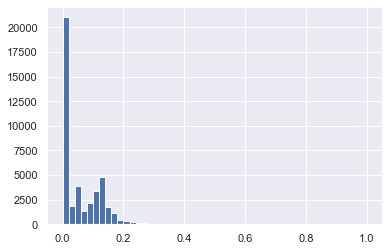

In [35]:
plt.hist(loan_data_defaults['recovery_rate'], bins=50);

For LGD we'll use a two stage approach for modelling:
- is the recovery rate equal to 0 or greater than 0?
- if the recovery rate is greater than 0, how much exactly is it?

We'll build a logistic regression model to estimate whether the recovery rate is greater than 0
For accounts where recovery rate is greater than 0, we'll use a linear regression model

In [36]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

In [37]:
loan_data_defaults['recovery_rate_0_1'].head()

1     1
8     1
9     1
12    1
14    1
Name: recovery_rate_0_1, dtype: int32

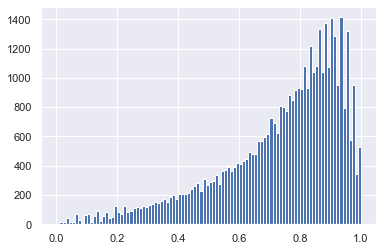

In [38]:
plt.hist(loan_data_defaults['CCF'], bins=100);

For EAD Model we'll use a multiple linear regression model.

#### Preprocessing for the second data

In [39]:
loan_data_defaults1 = data1[data1['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'])]

In [40]:
loan_data_defaults1.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
1,1077430,1314167,2500,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,f,456.46,435.17,117.08,0.0,2500.0,0,60,224.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1071795,1306957,5600,5600,21.28,152.39,F,F2,OWN,40000.0,Source Verified,Charged Off,small_business,958xx,CA,5.55,0.0,2.0,0.0,0.0,11.0,0.0,13.0,f,162.02,294.94,189.06,0.0,5600.0,4,60,164.0,72.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1071570,1306721,5375,5375,12.69,121.45,B,B5,RENT,15000.0,Verified,Charged Off,other,774xx,TX,18.08,0.0,0.0,0.0,0.0,2.0,0.0,3.0,f,673.48,533.42,269.29,0.0,5375.0,0,60,159.0,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
12,1064687,1298717,9000,9000,13.49,305.38,C,C1,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,245xx,VA,10.08,0.0,1.0,0.0,0.0,4.0,0.0,9.0,f,1256.14,570.26,444.30,0.0,9000.0,0,36,164.0,72.0,0,0,1,0,0,0,0,0

In [41]:
loan_data_defaults1['recovery_rate'] = loan_data_defaults1['recoveries'] / loan_data_defaults1['funded_amnt']

In [42]:
loan_data_defaults1['recovery_rate'] = np.where(loan_data_defaults1['recovery_rate'] > 1, 1, loan_data_defaults1['recovery_rate'])
loan_data_defaults1['recovery_rate'] = np.where(loan_data_defaults1['recovery_rate'] < 0, 0, loan_data_defaults1['recovery_rate'])

In [43]:
loan_data_defaults1['CCF'] = (loan_data_defaults1['funded_amnt'] - loan_data_defaults1['total_rec_prncp']) / loan_data_defaults1['funded_amnt']

In [44]:
loan_data_defaults1['recovery_rate_0_1'] = np.where(loan_data_defaults1['recovery_rate'] == 0, 0, 1)

In [45]:
loan_data_defaults.shape, loan_data_defaults1.shape

((43236, 46), (43236, 162))

#### Save dataset

In [46]:
loan_data_defaults.to_csv('loan_data/lgd_preprocessed_data.csv')
loan_data_defaults1.to_csv('loan_data/lgd_preprocessed_data1.csv')